In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# STEAM REVIEWS
## Trabajo realizado para la asignatura de Cloud y Big Data
#### En este proyecto hemos realizado una estudio/análisis sobre las reviews de steam extraídas de un conjunto de datos de 8Gb. 
La idea detrás del proyecto es analizar que tendencias se presentan a la hora de hacer reseñas en la plataforma de steam, así como la extracción de datos de interés para posibles desarrolladores. A medida que avancemos en este cuaderno podremos ver más información de lo que acabamos de mencionar. 

Los CSVs que leemos en este notebook los hemos extraído del código que se puede ver en el siguiente github: https://github.com/AlbertoGarciaDomenech/Proyecto-Final-CLOUD

El conjunto de datos lo hemos sacado de Kaggle en el siguiente link: https://www.kaggle.com/datasets/najzeko/steam-reviews-2021

Para realizar el proyecto se ha usado Python como lenguaje, Pyspark a través de Cloud, Github como host para la web en la que mostramos los resultados y la información del proyecto y cuadernos de Jupyter. 


### 1. Número de palabras medio utilizadas en las reviews para cada juego

In [3]:
df_avg = pd.read_csv("AverageWordsForGame.csv")

In [4]:
df_avg.sort_values(by=['avg(len_review)'])

,app_name,avg(len_review)
239,三国群英传8 Heroes of the Three Kingdoms 8,3.147454
101,Senren＊Banka,6.755264
176,Mirror,8.308165
0,Human: Fall Flat,8.838864
4,Wallpaper Engine,9.522624
...,...,...
90,Pathfinder: Kingmaker,105.042774
220,X Rebirth,105.625768
202,METAL GEAR SURVIVE,120.399610
47,Torment: Tides of Numenera,159.705082


A primera vista podemos observar que hay una gran diferencia entre el juego con menor número medio de palabras y el juego con mayor. Vamos a ver algunos valores estadísticos para sacar algo en claro

In [6]:
df_avg.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
avg(len_review),315.0,42.651427,22.655097,3.147454,27.216837,37.554922,55.067488,171.449474


La media general es de 42 palabras por review, por lo que en la tabla inicial los juegos con mayor media estaban más alejados de la media que los juegos con menor media. Por ejemplo el cuarto percentil empieza con 55 palabras de media, que está mucho más cerca del juego con menor media (3) que con el de mayor media (171)

También pensamos que igual la longitud de las reviews estaba relacionado de alguna manera con la calidad del juego o con el número de las mismas así que más adelante estudiaremos la correlación entre estas variables para intentar averiguar si alguna de estas depende de otras. 

A continuación vamos a separar el numero medio de palabras utilizada por review dependiendo de si se trata de una review favorable o de una en la que el usuario no recomienda el juego del que ha escrito

### 2. Numero de palabras medio haciendo distinción entre reviews positivas y negativas

Antes de pasar a analizar los resultados vamos a dejar escrito algunas ideas que tenemos sobre lo que va a suceder
- Creemos que las reviews negativas van a tener mayor numero medio de palabras
- Creemos que la tabla con las reviews positivas va a ser muy parecida a la anterior
- Creemos que va a haber algun juego con algun valor anormalmente grande en las reviews negativas

In [7]:
df_positivas = pd.read_csv("AverageWordPositive.csv")
df_positivas.sort_values(by=['avg(len_review)'])

,app_name,avg(len_review)
239,三国群英传8 Heroes of the Three Kingdoms 8,3.104340
101,Senren＊Banka,6.527178
176,Mirror,7.841331
0,Human: Fall Flat,8.618650
238,Neon Hardcorps,8.966292
...,...,...
292,Deus Ex: The Fall,109.814159
220,X Rebirth,118.583502
202,METAL GEAR SURVIVE,131.427286
47,Torment: Tides of Numenera,153.998403


In [8]:
df_negativas = pd.read_csv("AverageWordNegative.csv")
df_negativas.sort_values(by=['avg(len_review)'])

,app_name,avg(len_review)
239,三国群英传8 Heroes of the Three Kingdoms 8,3.206174
86,Battle Royale Trainer,10.645113
0,Human: Fall Flat,12.462647
4,Wallpaper Engine,12.616216
250,Overcooked! 2,14.570101
...,...,...
306,Axiom Verge,163.036101
47,Torment: Tides of Numenera,172.748175
90,Pathfinder: Kingmaker,173.455722
230,ULTRAKILL,182.384615


In [13]:
df_positivas.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
avg(len_review),315.0,40.272878,22.545323,3.10434,25.40357,34.853607,50.814023,176.775994


In [12]:
df_negativas.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
avg(len_review),315.0,67.281037,31.349083,3.206174,46.222587,62.931152,85.119601,193.063218


Viendo los resultados y lo que hemos planteado al inicio podemos ver que hemos acertado en dos de los tres puntos mencionados.
Por una parte la media de palabras en las reviews negativas es mayor que en el caso de las reviews positivas. Sin embargo sí que esperabamos que fuese aun mayor dicha diferencia pero al ser un conjunto tan grande de datos es normal que se normalice a valores más bajos de lo que cabría esperar
También podemos ver que la tabla de reviews positivas es más parecida a la de reviews en general que la de negativas, que incluye nuevos juegos que no aparecen en ninguna de las dos tablas. Esto se debe a que hay más reviews positivas que negativas en general, como estudiaremos más adelante. 
El tercer punto no se cumple y creemos que se debe a lo mencionado anteriormente. El conjunto de datos es lo suficientemente grande para que no haya valores anormalmente altos. 

Cuando dijimos que creíamos que las reviews negativas tendrían más palabras de media nos basábamos en la tendencia real que tenemos como seres humanos a enfocarnos más en los puntos negativos que en los positivas. Cuando hablamos de algo que no nos ha gustado solemos usar más palabras para intentar desahogarnos que cuando algo sí nos ha gustado

In [16]:
df_positivas = df_positivas.sort_values(by=['app_name'])
df_negativas = df_negativas.sort_values(by=['app_name'])

In [40]:
valores_pos = list(df_positivas['avg(len_review)'])[0:10]
valores_neg = list(df_negativas['avg(len_review)'])[0:10]

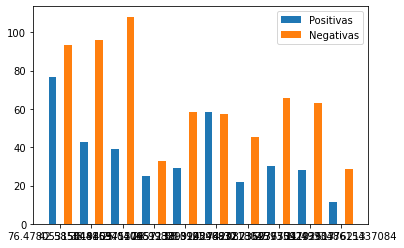

In [41]:
x = np.arange(10)
width = 0.25
plt.bar(x - width, valores_pos, width=width, label='Positivas')
plt.bar(x + width, valores_neg, width=width, label='Negativas')
plt.xticks(x, valores_pos)
plt.legend(loc='best')
plt.show()

Hemos seleccionado los primeros 10 juegos que han aparecido en ambas tablas y los hemos puesto en el mismo diagrama de barras. Como podemos ver, en 9 de los 10 casos el numero medio de palabras utilizado en las reviews negativas es mayor que en las reviews positivas. Vamos a ver el caso en el que no sucede esto. 

In [52]:
df_positivas.iloc[[5]]['app_name']

290    ATLAS
Name: app_name, dtype: object

In [50]:
df_positivas.loc[df_positivas['app_name'] == 'ATLAS'] 

,app_name,avg(len_review)
290,ATLAS,58.319549


In [49]:
df_negativas.loc[df_negativas['app_name'] == 'ATLAS'] 

,app_name,avg(len_review)
290,ATLAS,57.516516


'ATLAS' es el juego que escapa un poco de la tónica general aunque tan solo es una palabra más de media. Cuándo calculemos otros valores como el número de reseñas o la valoración de los juegos volveremos a tratar este punto para encontrar la lógica detrás de este suceso

### 3. Numero de reviews para cada juego

In [58]:
df_numreviews = pd.read_csv("NumReviewsForGame.csv")
df_numreviews = df_numreviews.sort_values(by=["count"])
df_numreviews

,app_name,count
238,Neon Hardcorps,200
151,DRAGON QUEST HEROES™ II,600
113,Shadow Complex Remastered,700
65,Out of the Park Baseball 19,700
182,Don't Escape: 4 Days to Survive,1013
...,...,...
192,Garry's Mod,655524
23,Terraria,672815
79,Tom Clancy's Rainbow Six Siege,841918
107,Grand Theft Auto V,1019116


In [65]:
df_numreviews.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
count,315.0,69039.273016,151035.465211,200.0,6606.5,22437.0,62222.5,1644255.0


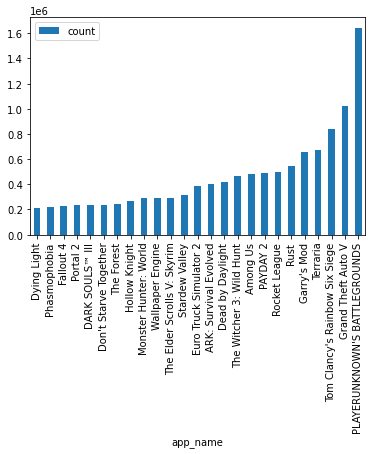

In [62]:
topreviews = df_numreviews.tail(25)
topreviews.plot.bar(x='app_name').get_figure().savefig('Top_reviews')

Vemos que hay una gran diferencia entre algunos juegos y otros. 'PLAYERUNKNOWNS's battlegrounds' es el juego con mayor número de reseñas, teniendo más de un millón seiscientas. 
La otra cara de la moneda le corresponde a 'NEON Hardcops' que tan solo cuenta con 200 reseñas. 

Viendo la media y la desviación tipica queda demostrada la gran diferencia entre los propios juegos aunque en el cuarto percentil podemos ver que empieza por un número menor que el de la media, por lo que vemos que los juegos con mayor numero de reviews condicionan mucho al resto de datos. Unos pocos juegos acaparan la gran mayoría de reviews aunque sean menos juegos que el resto

In [63]:
df_numreviews = df_numreviews.sort_values(by=['app_name'])

In [64]:
df_numreviews.iloc[[5]]

,app_name,count
290,ATLAS,37210


En el apartado anterior vimos que en el caso del juego 'ATLAS' no se cumplía la tendencia de escribir más palabras en las reviews negativas que en las positivas. Ahora vemos que el numero de reviews de este juego es bastante inferior a la media y aún contando la desviación seguiría estando por debajo. Con esto podemos intuir que simplemente se trataba de un caso especial, o que la diferencia era tan escasa que no había ningún motivo para encontrar una lógica. 

### 4. Correlación entre numero medio de palabras y numero de reviews por juego

Viendo las tablas hemos llegado a un pensamiento en el que creemos que puede existir alguna correlación entre el numero medio de palabras que se utiliza en las reviews y el numero de las mismas para cada juego. Creemos que cuantas más reviews tenga un juego más probable es que se hayan utilizado menos palabras de media. Pensamos esto por la tendencia de las reviews a ser más cortas que largas, como hemos visto antes. 

In [66]:
df_numreviews['count'].corr(df_avg['avg(len_review)'])

-0.30029140621500905

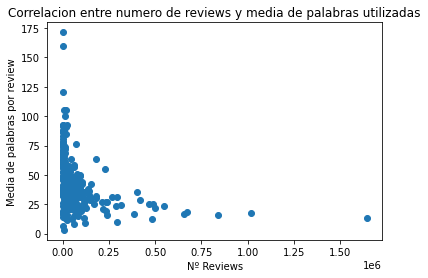

[[ 1.         -0.30029141]
 [-0.30029141  1.        ]]


In [69]:
df_numreviews = df_numreviews.sort_values(by=['app_name'])
df_avg = df_avg.sort_values(by=['app_name'])
x = list(df_numreviews['count'])
y = list(df_avg['avg(len_review)'])
plt.scatter(x, y)
plt.title('Correlacion entre numero de reviews y media de palabras utilizadas')
plt.xlabel('Nº Reviews')
plt.ylabel('Media de palabras por review')
plt.show()
print(np.corrcoef(x, y))

A pesar de lo que creíamos, la correlación entre el número de reviews que tiene un juego y el numero medio de palabras utilizado por reviews no es muy fuerte. No se puede afirmar que haya alguna relación entre estos dos conceptos aunque sí que está cerca de nuestro pensamiento inicial que aseguraba que a la hora de escribir reseñas la tendencia era de usar menos palabras. Es decir, pensabamos que lo normal en esta web era escribir reviews cortas por encima de largas.

Aunque la correlación sea únicamente de -0.3 se puede intuir levemente que nuestro pensamiento no iba mal encaminado

### 5. Porcentajes de reviews favorables por juego

A continuación vamos a ver los porcentajes de reviews favorables de cada juego. Aunque este no sea el medidor oficial para saber la valoración que tiene un juego lo trataremos como tal ya que consideramos que si un juego tiene un 99% de reviews favorables va a ser un juego mejor valorado que otro que tenga un 80%, por poner un ejemplo

In [70]:
df_percentages = pd.read_csv("PercentagesReviewsGame.csv")
df_percentages = df_percentages.sort_values(by=['app_name'])
df_percentages

,app_name,recommended,count,porcentaje
135,20XX,True,3349,0.927701
21,A Hat in Time,True,34318,0.981103
2,A Short Hike,True,5797,0.991449
163,A Way Out,True,9766,0.892606
245,ARK: Survival Evolved,True,315243,0.788090
...,...,...,...,...
192,XCOM 2,True,52732,0.855539
124,Yakuza 0,True,29774,0.937026
259,Youtubers Life,True,9566,0.757943
194,theHunter: Call of the Wild™,True,57452,0.854432


In [71]:
df_percentages = df_percentages.sort_values(by=['porcentaje'])
df_percentages

,app_name,recommended,count,porcentaje
314,Identity,True,439,0.243348
313,RollerCoaster Tycoon World,True,1300,0.245098
312,SOS,True,1921,0.278406
311,Umbrella Corps,True,707,0.282236
310,NBA 2K18,True,5465,0.291965
...,...,...,...,...
4,Factorio,True,107111,0.989186
3,The Henry Stickmin Collection,True,19211,0.990258
2,A Short Hike,True,5797,0.991449
1,Senren＊Banka,True,5004,0.994041


In [72]:
df_percentages.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
count,315.0,60389.238095,119504.734523,89.000000,5019.000000,19335.00000,57671.500000,886417.000000
porcentaje,315.0,0.843161,0.169227,0.243348,0.803483,0.90075,0.963009,0.995344


Aquí podemos ver que la media gira en torno al 85%. En este caso vemos que hay una tendencia favorable en contraposición de lo que habíamos visto anteriormente. 
Es lógico que la media favorezca las buenas notas teniendo en cuenta que hay muchas más reviews positivas que negativas en la plataforma de Steam. 
El primer percentil acaba con 80% de reviews favorables por lo que vemos y sabemos de buena mano que hay muy pocos juegos que no lleguen al 50%

Vamos a volver al caso de 'ATLAS' para ver que porcentaje de reviews positivas tiene

In [73]:
df_percentages = df_percentages.sort_values(by=['app_name'])
df_percentages.iloc[[5]]

,app_name,recommended,count,porcentaje
293,ATLAS,True,17290,0.46466


Como vemos ATLAS es uno de los pocos juegos que no aprueban. Esto sigue sin decirnos si tiene que ver con que la longitud de las reviews positivas sea mayor que la de las negativas en este caso. Más adelante estudiaremos otra correlación para intentar encontrar un sentido

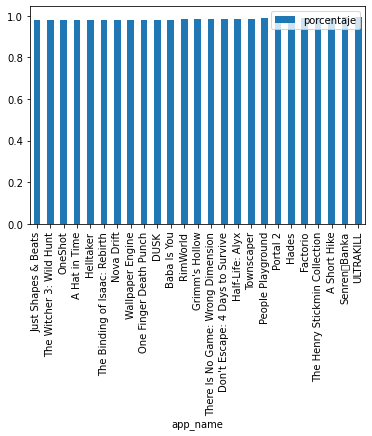

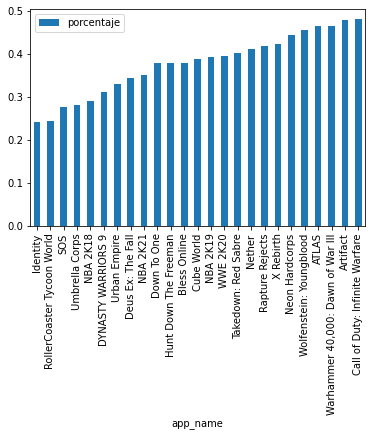

In [82]:
df_percentages = df_percentages.sort_values(by=['porcentaje'])
toppercentages = df_percentages.tail(25)
worstpercentages = df_percentages.head(25)
fig1 = toppercentages.plot(x='app_name', y='porcentaje', kind='bar')
fig2 = worstpercentages.plot(x='app_name', y='porcentaje', kind='bar')

Como vemos en las dos gráficas anteriores hay una gran diferencia entre los 25 juegos con mayor porcentaje de reseñas positivas y los 25 juegos con menor. 

### 6. Numero de reviews por juego e idioma 

In [84]:
df_numreviews2 = pd.read_csv('ReviewsPerGameAndLanguage.csv')
df_numreviews2 = df_numreviews2.sort_values(by=['app_name'])
df_numreviews2

,app_name,language,count
5343,20XX,koreana,54
3222,20XX,italian,3
2346,20XX,french,54
3264,20XX,polish,4
4055,20XX,english,2593
...,...,...,...
2422,三国群英传8 Heroes of the Three Kingdoms 8,koreana,15
2469,三国群英传8 Heroes of the Three Kingdoms 8,vietnamese,2
16,三国群英传8 Heroes of the Three Kingdoms 8,tchinese,565
8017,三国群英传8 Heroes of the Three Kingdoms 8,english,65


Una vez hemos obtenido este CSV nos damos cuenta de que tan solo es verdaderamente útil para tratar juegos específicos más que para sacar alguna conclusión general. Por esto vamos a volver al caso de 'ATLAS', para ver que ocurre en el único juego en el que hemos hecho distinción de momento. 

In [85]:
df_numreviews2.loc[df_numreviews2['app_name'] == 'ATLAS'] 

,app_name,language,count
7738,ATLAS,russian,2385
3850,ATLAS,english,19623
2791,ATLAS,ukrainian,16
5340,ATLAS,latam,156
5524,ATLAS,tchinese,166
5768,ATLAS,french,1562
5339,ATLAS,norwegian,84
5769,ATLAS,romanian,11
6441,ATLAS,spanish,2289
7079,ATLAS,swedish,157


Vemos que hay mucha variedad de idiomas para tratarse de un juego con 37000 reseñas y que no llega al 50% en cuanto a porcentajes de reviews favorables.

Sin embargo, por mucha variedad que haya vemos que predomina el inglés seguido del ruso y del español. ¿Esto va a ser la tónica general o es tan solo en este caso? Para resolver esta pregunta en el siguiente apartado vamos a estudiar los idiomas más utilizados en las reseñas de la plataforma

### 7. Idiomas más utilizados

In [89]:
df_languages = pd.read_csv('LanguagesUsed.csv')
df_languages = df_languages.sort_values(by=['count'])
df_languages

,language,count
27,vietnamese,6580
26,bulgarian,10454
25,greek,14472
24,ukrainian,21169
23,romanian,32730
22,norwegian,36797
21,finnish,54712
20,danish,55915
19,latam,70103
18,hungarian,71001


En el apartado anterior nos preguntabamos si lo normal era que el inglés fuese el idioma más utilizado seguido del ruso y del español. En la tabla anterior podemos ver que efectivamente el inglés si es el idioma más utilizado aunque el que le sigue es el chino, por encima del ruso. El español alcanza la quinta posición.

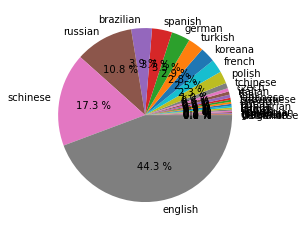

In [94]:
languages = list(df_languages['language'])
nreviews = list(df_languages['count'])
plt.pie(nreviews, labels=languages, autopct="%0.1f %%")
plt.show()

Vemos que el inglés monopoliza hasta un 44.3% todas las reseñas que se han extraído del conjunto de datos. El chino y el ruso también ocupan un 17.3% y un 10.8% respectivamente. 
Entre estos tres idiomas suman un 72,4% de todas las reseñas de la plataforma, casi 3/4. No es tanto si tenemos en cuenta la gran cantidad de población mundial que tiene el inglés o el chino como primera lengua, y también hay que tener en cuenta la accesibilidad a steam ya que tiene más facil acceder a esta plataforma un británico que una persona que viva en algún pais subdesarrollado 

### 8. Porcentajes de reviews favorables segun el idioma

In [108]:
df_percentages_languages = pd.read_csv('LanguagePercentageRecommended.csv')
df_percentages_languages = df_percentages_languages[df_percentages_languages['recommended'] == 1]
df_percentages_languages = df_percentages_languages.sort_values(by=['porcentaje'])
df_percentages_languages

,recommended,language,count,porcentaje
41,True,schinese,2902943,0.771041
25,True,japanese,65848,0.805441
46,True,tchinese,182088,0.834489
27,True,koreana,516673,0.841992
16,True,german,666223,0.885233
10,True,english,8584444,0.890924
39,True,russian,2095434,0.892092
23,True,italian,120023,0.900350
2,True,bulgarian,9434,0.902430
51,True,turkish,573984,0.902678


En la celda anterior hemos filtrado para mostrar unicamente el porcentaje de reviews favorables ya que el de reviews negativas se puede calcular restando el anterior a uno. 

Como vemos nos encontramos con una tónica favorable como cabía esperar pero nos sorprende china. Las reviews que se han redactado en chino suelen ser un poco más negativas que en el resto de idiomas. Pero no solo en chino, también en japonés y coreano. Parece indicar que en Asia hay una tendencia más exigente a la hora de recomendar un juego que en occidente. 

También vemos que el inglés está en una posición relativamente baja teniendo en cuenta que es el idioma más utilizado. ¿Cuanta más reseñas haya en un idioma, es más probable que haya mayor porcentaje de reviews negativas? Lo resolveremos en el siguiente apartado

In [114]:
df_percentages_languages.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
count,28.0,679378.928571,1.682113e+06,6049.000000,51150.500000,96600.500000,531000.750000,8.584444e+06
porcentaje,28.0,0.904472,4.310940e-02,0.771041,0.898286,0.918397,0.928091,9.546288e-01


Aquí observamos que la media es de 90%

### 9. Correlación entre numero de reviews por idioma y porcentajes de reviews positivas

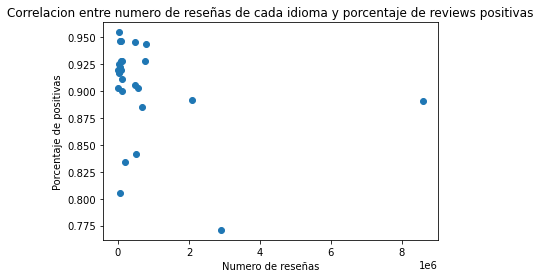

[[ 1.         -0.25974968]
 [-0.25974968  1.        ]]


In [116]:
x = list(df_percentages_languages['count'])
y = list(df_percentages_languages['porcentaje'])
plt.scatter(x, y)
plt.title('Correlacion entre numero de reseñas de cada idioma y porcentaje de reviews positivas')
plt.xlabel('Numero de reseñas')
plt.ylabel('Porcentaje de positivas')
plt.show()
print(np.corrcoef(x, y))

En el anterior apartado nos preguntabamos si había alguna correlación entre el número de reseñas que hay en un idioma y el porcentaje de reseñas positivas que tiene dicho idioma. Aquí vemos que no. La correlación es muy baja, tan solo de un 0.25. 

Es por esto por lo que no podemos asegurar que cuantas más reseñas haya en un idioma, mayor es el porcentaje de reviews negativas. Aunque sí que sigue la tendencia, el valor de correlación no es lo suficientemente alto para afirmarlo

### 10. Las 30 reviews con mayor 'helpful votes'

In [117]:
df_helpful = pd.read_csv('30reviewsmostliked.csv')
df_helpful

,app_name,review
0,The Witcher 3: Wild Hunt,🎁\n🎁’[h1] [b]‘官方奖励免费活动链接:→ https://usnhskhf.w...
1,The Witcher 3: Wild Hunt,寻路功能真的有点阴间，总体上讲还是很不错的游戏
2,The Witcher 3: Wild Hunt,Se um dia alguém falar que esse jogo é ruim na...
3,The Witcher 3: Wild Hunt,不玩此生遗憾，RPG游戏里的天花板，太吸引人了
4,The Witcher 3: Wild Hunt,拔DIAO无情打桩机--杰洛特!!!
5,The Witcher 3: Wild Hunt,巫师3NB
6,The Witcher 3: Wild Hunt,"One of the best RPG's of all time, worthy of a..."
7,The Witcher 3: Wild Hunt,大作
8,The Witcher 3: Wild Hunt,"good story, good graphics. lots to do."
9,The Witcher 3: Wild Hunt,"dis gud,"


Aquí nos hemos podido dar cuenta de que había un problema con la columna de 'votes_helpful' de nuestro conjunto de datos, ya que el codigo para obtener las reviews es correcto.

En este apartado queríamos estudiar que es lo que se valoraba más en una reseña. Si el ingenio, la brevedad, o la extensión de la misma, entre otros criterios

### 11. Correlación entre valoraciones de un juego y el numero de reseñas que tiene

También nos ha surgido la curiosidad y queremos ver si hay alguna relación entre las valoraciones de un juego y el numero de reseñas que tiene el mismo. 

In [121]:
df_percentages = df_percentages.sort_values(by=['app_name'])
df_numreviews = df_numreviews.sort_values(by=['app_name'])

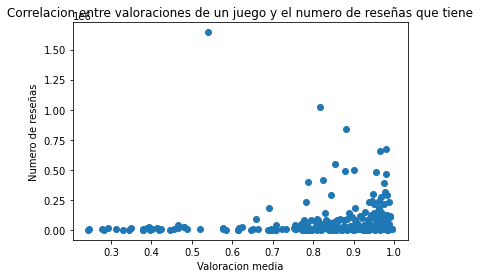

[[1.         0.08548442]
 [0.08548442 1.        ]]


In [122]:
x = list(df_percentages['porcentaje'])
y = list(df_numreviews['count'])
plt.scatter(x, y)
plt.title('Correlacion entre valoraciones de un juego y el numero de reseñas que tiene')
plt.xlabel('Valoracion media')
plt.ylabel('Numero de reseñas')
plt.show()
print(np.corrcoef(x, y))

Al contrario que en otros casos, aquí queda descartado por completo cualquier correlación entre el numero de reseñas y las valoraciones del juego. 

Con esto queriamos averiguar sí el hecho de que un juego tenga más reseñas implica que haya más polaridad sobre la opinión pública del juego o no, pero hemos visto que acaba siendo independientes el uno del otro